In [1]:
#Import numpy and pandas
import numpy as np
import pandas as pd

#Read the data and head it to make sure you have properly read it.
cc_data = pd.read_csv("cc_data.csv")
cc_data.head(5)

,behavior_sexualRisk,behavior_eating,behavior_personalHygine,intention_aggregation,intention_commitment,attitude_consistency,attitude_spontaneity,norm_significantPerson,norm_fulfillment,perception_vulnerability,perception_severity,motivation_strength,motivation_willingness,socialSupport_emotionality,socialSupport_appreciation,socialSupport_instrumental,empowerment_knowledge,empowerment_abilities,empowerment_desires,ca_cervix
0,10,13,12,4,7,9,10,1,8,7,3,14,8,5,7,12,12,11,8,1
1,10,11,11,10,14,7,7,5,5,4,2,15,13,7,6,5,5,4,4,1
2,10,15,3,2,14,8,10,1,4,7,2,7,3,3,6,11,3,3,15,1
3,10,11,10,10,15,7,7,1,5,4,2,15,13,7,4,4,4,4,4,1
4,8,11,7,8,10,7,8,1,5,3,2,15,5,3,6,12,5,4,7,1


In [2]:
#Analyze the shape of the dataset you are utilizing.
print('The shape of the data is:', cc_data.shape)

The shape of the data is: (72, 20)


In [3]:
#Calculate descriptive statistics for each column of the dataset.
cc_data.describe()

,behavior_sexualRisk,behavior_eating,behavior_personalHygine,intention_aggregation,intention_commitment,attitude_consistency,attitude_spontaneity,norm_significantPerson,norm_fulfillment,perception_vulnerability,perception_severity,motivation_strength,motivation_willingness,socialSupport_emotionality,socialSupport_appreciation,socialSupport_instrumental,empowerment_knowledge,empowerment_abilities,empowerment_desires,ca_cervix
count,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000
mean,9.666667,12.791667,11.083333,7.902778,13.347222,7.180556,8.611111,3.125000,8.486111,8.513889,5.388889,12.652778,9.694444,8.097222,6.166667,10.375000,10.541667,9.319444,10.277778,0.291667
std,1.186782,2.361293,3.033847,2.738148,2.374511,1.522844,1.515698,1.845722,4.907577,4.275686,3.400727,3.207209,4.130406,4.243171,2.897303,4.316485,4.366768,4.181874,4.482273,0.457719
min,2.000000,3.000000,3.000000,2.000000,6.000000,2.000000,4.000000,1.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,0.000000
25%,10.000000,11.000000,9.000000,6.000000,11.000000,6.000000,8.000000,1.000000,3.000000,5.000000,2.000000,11.000000,7.000000,3.000000,3.750000,6.750000,7.000000,5.000000,6.750000,0.000000
50%,10.000000,13.000000,11.000000,10.000000,15.000000,7.000000,9.000000,3.000000,7.000000,8.000000,4.000000,14.000000,11.000000,9.000000,6.500000,12.000000,12.000000,10.000000,11.000000,0.000000
75%,10.000000,15.000000,14.000000,10.000000,15.000000,8.000000,10.000000,5.000000,14.000000,13.000000,9.000000,15.000000,13.000000,11.250000,9.000000,14.250000,15.000000,13.000000,15.000000,1.000000
max,10.000000,15.000000,15.000000,10.000000,15.000000,10.000000,10.000000,5.000000,15.000000,15.000000,10.000000,15.000000,15.000000,15.000000,10.000000,15.000000,15.000000,15.000000,15.000000,1.000000


In [4]:
#Define X and Y for the data set.
Y = np.array(cc_data[['ca_cervix']])
X = np.array(cc_data[['behavior_sexualRisk', 'behavior_eating', 'behavior_personalHygine', 'intention_aggregation', 'intention_commitment', 'attitude_consistency', 'attitude_spontaneity', 'norm_significantPerson', 'norm_fulfillment', 'perception_vulnerability', 'perception_severity', 'motivation_strength', 'motivation_willingness', 'socialSupport_emotionality', 'socialSupport_appreciation', 'socialSupport_instrumental', 'empowerment_knowledge', 'empowerment_abilities', 'empowerment_desires']])

In [6]:
#Create a testing and training set. The training set should include 75% of the data points.
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.75, random_state=42)

In [7]:
#Perform a Stratified K-Folds cross-validator to increase generalizability of assay.
from sklearn.model_selection import StratifiedKFold
SK = StratifiedKFold(n_splits=5)
SK.get_n_splits(X, Y)

5

In [8]:
#Analyze the Stratified K-Folds cross-validator parameters.
print(SK)

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)


In [18]:
#Print the 5 different training and testing sets creates by the Stratified K-Folds cross-validator.
for i, (train_index, val_index) in enumerate(SK.split(X, Y)):
    print("Training set:", train_index, "Testing set:", val_index)
    X_train_SK, X_test_SK = X[train_index], X[val_index]
    Y_train_SK, Y_test_SK = Y[train_index], Y[val_index]

Training set: [ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 31 32 33 34 35 36 37 38
 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62
 63 64 65 66 67 68 69 70 71] Testing set: [ 0  1  2  3  4 21 22 23 24 25 26 27 28 29 30]
Training set: [ 0  1  2  3  4  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27
 28 29 30 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62
 63 64 65 66 67 68 69 70 71] Testing set: [ 5  6  7  8 31 32 33 34 35 36 37 38 39 40 41]
Training set: [ 0  1  2  3  4  5  6  7  8 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27
 28 29 30 31 32 33 34 35 36 37 38 39 40 41 52 53 54 55 56 57 58 59 60 61
 62 63 64 65 66 67 68 69 70 71] Testing set: [ 9 10 11 12 42 43 44 45 46 47 48 49 50 51]
Training set: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 17 18 19 20 21 22 23 24 25 26 27
 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 62 63 64 65 66 67 68 69 70 71] Testing set: [13 14 15 16 52 53 54 55 56 57 58 59 60 61]
Trai

In [26]:
#Look at the shapes of your teating and training features and labels.
print('X_train Shape:', X_train_SK.shape)
print('Y_train Shape:', Y_train_SK.shape)
print('X_test Shape:', X_test_SK.shape)
print('Y_test Shape:', Y_test_SK.shape)

X_train Shape: (58, 19)
Y_train Shape: (58, 1)
X_test Shape: (14, 19)
Y_test Shape: (14, 1)


In [27]:
#Use a for loop to create a list of decision tree classifiers all fitted to the training set that have varying n_estimators values 
from sklearn.ensemble import RandomForestClassifier

trees = []
for d in [61,62,63,64,65,66,67,68,69,70]:
    trees.append(RandomForestClassifier(random_state=42, n_estimators=d).fit(X_train_SK, Y_train_SK.ravel()))

In [28]:
#Use a function to look at the accuracy scores for the training and testing sets at each specific n_estimators value.
from sklearn.ensemble import RandomForestClassifier

def score(tree, X, Y):
    return (tree.score(X, Y))
for t in trees:
    print("For number of estimators equal to {}".format(t.get_params()["n_estimators"]))
    print("\tAccuracy on training set: {}".format(score(t, X_train_SK, Y_train_SK)))
    print("\tAccuracy on test set: {}".format(score(t, X_test_SK, Y_test_SK)))

For number of estimators equal to 61
	Accuracy on training set: 1.0
	Accuracy on test set: 0.9285714285714286
For number of estimators equal to 62
	Accuracy on training set: 1.0
	Accuracy on test set: 0.9285714285714286
For number of estimators equal to 63
	Accuracy on training set: 1.0
	Accuracy on test set: 0.9285714285714286
For number of estimators equal to 64
	Accuracy on training set: 1.0
	Accuracy on test set: 0.9285714285714286
For number of estimators equal to 65
	Accuracy on training set: 1.0
	Accuracy on test set: 0.9285714285714286
For number of estimators equal to 66
	Accuracy on training set: 1.0
	Accuracy on test set: 0.9285714285714286
For number of estimators equal to 67
	Accuracy on training set: 1.0
	Accuracy on test set: 0.9285714285714286
For number of estimators equal to 68
	Accuracy on training set: 1.0
	Accuracy on test set: 0.9285714285714286
For number of estimators equal to 69
	Accuracy on training set: 1.0
	Accuracy on test set: 0.9285714285714286
For number

In [47]:
#Use a for loop to create a list of decision tree classifiers all fitted to the training set that have varying max_depth values 
from sklearn.ensemble import RandomForestClassifier

trees = []
for d in [1,2,3,4,5,6]:
    trees.append(RandomForestClassifier(random_state=42, n_estimators=64, max_depth=d).fit(X_train_SK, Y_train_SK.ravel()))

In [48]:
#Use a function to look at the accuracy scores for the training and testing sets at each specific max_depth value.
from sklearn.ensemble import RandomForestClassifier

def score(tree, X, Y):
    return (tree.score(X, Y))
for t in trees:
    print("For max depth equal to {}".format(t.get_params()["max_depth"]))
    print("\tAccuracy on training set: {}".format(score(t, X_train_SK, Y_train_SK)))
    print("\tAccuracy on test set: {}".format(score(t, X_test_SK, Y_test_SK)))

For max depth equal to 1
	Accuracy on training set: 0.8793103448275862
	Accuracy on test set: 0.8571428571428571
For max depth equal to 2
	Accuracy on training set: 0.9482758620689655
	Accuracy on test set: 0.9285714285714286
For max depth equal to 3
	Accuracy on training set: 0.9827586206896551
	Accuracy on test set: 0.9285714285714286
For max depth equal to 4
	Accuracy on training set: 1.0
	Accuracy on test set: 0.9285714285714286
For max depth equal to 5
	Accuracy on training set: 1.0
	Accuracy on test set: 0.9285714285714286
For max depth equal to 6
	Accuracy on training set: 1.0
	Accuracy on test set: 0.9285714285714286


In [49]:
#Use a random forest classifier with the ideal parameters to make the various decision trees.
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=64, max_depth=2, random_state=42)
RF.fit(X_train, Y_train.ravel())

RandomForestClassifier(max_depth=2, n_estimators=64, random_state=42)

In [50]:
#Confirm the number of estimators used in the random forest.
len(RF.estimators_)

64

In [51]:
#Confirm the max depth of the trees created in the random forest.
RF.estimators_[0].tree_.max_depth

2

In [52]:
#Predict whether or not a patient will develop cervical cancer according to their behavior scores.
RF.predict([[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,1,2,3,4]])

array([0])

In [53]:
#Find the most important features from the dataset.
importances = list(RF.feature_importances_)

# List of tuples with each specific feature and its importance.
featureimportance = [(feature, round(importance, 3)) for feature, importance in zip(Y, importances)]

# Sort the output so that it is in order from most important to least important feature. 
featureimportance = sorted(featureimportance, key = lambda x: x[1], reverse = True)

# Print a list of each feature and its importance. 
[print('Feature: {:20}         Importance: {}'.format(*pair)) for pair in featureimportance];

Feature: empowerment_abilities         Importance: 0.145
Feature: motivation_strength          Importance: 0.112
Feature: behavior_personalHygine         Importance: 0.109
Feature: empowerment_knowledge         Importance: 0.102
Feature: perception_vulnerability         Importance: 0.09
Feature: motivation_willingness         Importance: 0.084
Feature: norm_fulfillment             Importance: 0.069
Feature: perception_severity          Importance: 0.064
Feature: behavior_sexualRisk          Importance: 0.058
Feature: empowerment_desires          Importance: 0.05
Feature: intention_commitment         Importance: 0.032
Feature: intention_aggregation         Importance: 0.023
Feature: socialSupport_instrumental         Importance: 0.016
Feature: socialSupport_appreciation         Importance: 0.014
Feature: behavior_eating              Importance: 0.011
Feature: attitude_consistency         Importance: 0.01
Feature: attitude_spontaneity         Importance: 0.007
Feature: socialSupport_emot

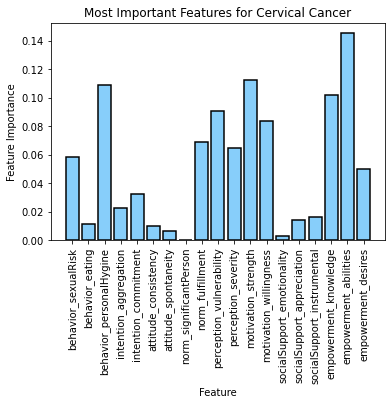

In [149]:
#Develop a bar graph that visualizes the features and their importance.
from matplotlib import pyplot as plt

# Define the x-values that are being plotted.
x_values = list(range(len(importances)))

# Create a bar graph.
plt.bar(x_values, importances, orientation = 'vertical', color = 'lightskyblue', edgecolor = 'k', linewidth = 1.5)

# Define the labels for the x-axis. 
plt.xticks(x_values, Y, rotation='vertical')

# Define the labels for the x and y axis and title the bar graph.
plt.ylabel('Feature Importance'); plt.xlabel('Feature'); plt.title('Most Important Features for Cervical Cancer');

#Save graph as a png file to my desktop.
plt.savefig('Desktop/FeatureImportance.png', bbox_inches='tight')

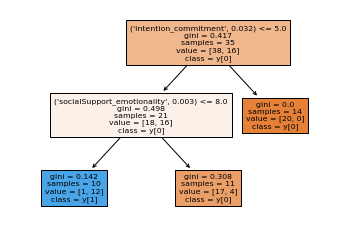

In [150]:
#Plot the individual trees that were constructed in the random forest. Save tree to desktop as a png.
from sklearn.tree import plot_tree

RFtree = RF.estimators_[0]
plt.figure()
plot_tree(RFtree, feature_names= featureimportance, class_names= True,  fontsize=7.75, filled=True)
plt.savefig('Desktop/RFTree.png',format='png',bbox_inches = "tight")